In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)

In [78]:
data = pd.read_csv('comments.csv')
print(data.shape)
data

(83534, 14)


,post_id,comment_id,comment_author,comment_datetime,comment_score,comment_text,comment_author_post_karma,comment_tag,comment_hour,comment_weekday,post_datetime,post_hour,post_weekday,time_diff
0,145hyey,jnlh1vx,Illustrious_Risk3732,2023-06-09 23:42:43,1.0,He even gives him self Awards to make sure he ...,17109.0,Social Media,23,Fri,2023-06-09 21:51:15,21,Fri,1.857778
1,1453u2o,jnjtk7f,ProdigiousPlays,2023-06-09 16:47:51,1.0,RIF already announced it s shutting down at th...,118844.0,Social Media,16,Fri,2023-06-09 12:25:11,12,Fri,4.377778
2,1453u2o,jnjtv9u,YJSubs,2023-06-09 16:49:52,1.0,I wonder which sub left on that day,50085.0,Social Media,16,Fri,2023-06-09 12:25:11,12,Fri,4.411389
3,1453u2o,jnjusm9,jamnewton22,2023-06-09 16:55:57,1.0,Oh I m sure this will go well lol,171705.0,Social Media,16,Fri,2023-06-09 12:25:11,12,Fri,4.512778
4,1453u2o,jnjvwlv,TriLink710,2023-06-09 17:03:15,1.0,Oh boy i can t wait for him to say the devs a...,70192.0,Social Media,17,Fri,2023-06-09 12:25:11,12,Fri,4.634444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83529,149drws,jo7dx9v,talonredwing,2023-06-15 08:45:37,2.0,You guys are all quants,1927.0,Hardware,8,Thu,2023-06-14 17:30:04,17,Wed,15.259167
83530,149drws,jo77nni,MrCamlost,2023-06-15 07:11:44,0.0,I can t make my mind up about this,2456.0,Hardware,7,Thu,2023-06-14 17:30:04,17,Wed,13.694444
83531,149drws,jo5i09h,a4mula,2023-06-14 21:26:52,2.0,I dunno you re trying to drag me into rabbit ...,38276.0,Hardware,21,Wed,2023-06-14 17:30:04,17,Wed,3.946667
83532,149drws,jo7eblf,ninta,2023-06-15 08:51:38,4.0,Keep trying At some point your brainwave will...,9256.0,Hardware,8,Thu,2023-06-14 17:30:04,17,Wed,15.359444


In [5]:
data.describe()

,comment_score,comment_author_post_karma,comment_hour,post_hour,time_diff
count,83534.000000,8.353400e+04,83534.000000,83534.000000,83534.000000
mean,34.183171,8.461448e+04,12.729499,14.230996,9.212319
std,304.504055,1.831331e+05,7.152262,5.845288,12.104479
min,-166.000000,-1.000000e+02,0.000000,0.000000,0.000000
25%,1.000000,6.894250e+03,6.000000,11.000000,3.630000
50%,3.000000,2.825500e+04,14.000000,15.000000,6.782778
75%,10.000000,9.072700e+04,19.000000,19.000000,11.466806
max,22871.000000,8.745251e+06,23.000000,23.000000,315.482222


# Time analysis

In [21]:
hours_comment = data[['comment_hour', 'comment_weekday','comment_score']]
hours_comment

,comment_hour,comment_weekday,comment_score
0,23,Fri,1.0
1,16,Fri,1.0
2,16,Fri,1.0
3,16,Fri,1.0
4,17,Fri,1.0
...,...,...,...
83529,8,Thu,2.0
83530,7,Thu,0.0
83531,21,Wed,2.0
83532,8,Thu,4.0


Group by weekday and hour

In [49]:
group_df = hours_comment.groupby(['comment_hour', 'comment_weekday']).count()
group_df = group_df.unstack().sort_values('comment_hour', ascending=False)
group_df = group_df.reindex(columns=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], level='comment_weekday')
group_df

comment_score                               
comment_weekday           Mon  Tue  Wed  Thu   Fri  Sat  Sun
comment_hour                                                
23                        320  324  578  963   778  445  593
22                        449  364  622  749   897  542  661
21                        557  394  617  805   886  575  671
20                        581  351  711  823   812  455  673
19                        657  449  636  738   802  539  682
18                        552  502  751  665   787  575  684
17                        559  437  891  640   822  652  623
16                        569  399  680  612   911  801  701
15                        654  386  643  718   925  964  706
14                        673  298  613  784  1094  644  597
13                        705  225  563  762   928  598  498
12                        493  168  398  608   773  471  453
11                        331  157  242  438   577  379  362
10                        246  161  155  301   382  271  257
9                         163  157   98  221   306  269  247
8                         194  120  114  230   257  287  274
7                         294  144  145  250   251  284  297
6                         358  210  169  325   354  290  288
5                         450  250  210  308   420  377  364
4                         406  262  260  405   446  431  481
3                         491  398  364  521   490  513  542
2                         592  347  368  628   631  544  529
1                         600  342  327  709   662  660  506
0                         608  289  291  587   923  754  539

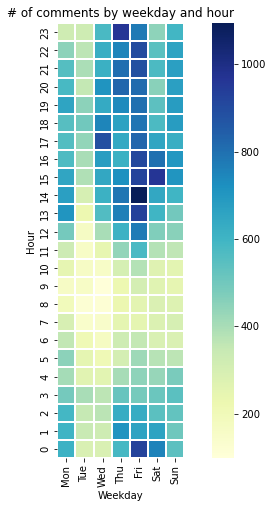

In [60]:
plt.figure(figsize=(10,8))
ax = sns.heatmap(group_df, linewidth=1.5, square=True, cmap='YlGnBu')
ax.set(xticklabels=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], xlabel='Weekday')
ax.set(ylabel='Hour', title='# of comments by weekday and hour')
plt.show()

### Differentiating numerical and categorical features

In [110]:
num_feat = data.describe().columns.to_list()
num_df = data[num_feat]
num_df.head()

,comment_score,comment_author_post_karma,comment_hour,post_hour,time_diff,neg_score,neutral_score,pos_score,comp_score
0,1.0,17109.0,23,21,1.857778,0.117,0.652,0.230,0.3818
1,1.0,118844.0,16,12,4.377778,0.095,0.789,0.117,0.1923
2,1.0,50085.0,16,12,4.411389,0.000,1.000,0.000,0.0000
3,1.0,171705.0,16,12,4.512778,0.000,0.357,0.643,0.7351
4,1.0,70192.0,17,12,4.634444,0.042,0.958,0.000,-0.1027


In [62]:
cat_feat = []
for i in data.columns:
    if i not in num_feat:
        cat_feat.append(i)
cat_feat.append('comment_score')
cat_feat

['post_id',
 'comment_id',
 'comment_author',
 'comment_datetime',
 'comment_text',
 'comment_tag',
 'comment_weekday',
 'post_datetime',
 'post_weekday',
 'comment_score']

In [63]:
cat_df = data[cat_feat]
cat_df.head()

,post_id,comment_id,comment_author,comment_datetime,comment_text,comment_tag,comment_weekday,post_datetime,post_weekday,comment_score
0,145hyey,jnlh1vx,Illustrious_Risk3732,2023-06-09 23:42:43,He even gives him self Awards to make sure he ...,Social Media,Fri,2023-06-09 21:51:15,Fri,1.0
1,1453u2o,jnjtk7f,ProdigiousPlays,2023-06-09 16:47:51,RIF already announced it s shutting down at th...,Social Media,Fri,2023-06-09 12:25:11,Fri,1.0
2,1453u2o,jnjtv9u,YJSubs,2023-06-09 16:49:52,I wonder which sub left on that day,Social Media,Fri,2023-06-09 12:25:11,Fri,1.0
3,1453u2o,jnjusm9,jamnewton22,2023-06-09 16:55:57,Oh I m sure this will go well lol,Social Media,Fri,2023-06-09 12:25:11,Fri,1.0
4,1453u2o,jnjvwlv,TriLink710,2023-06-09 17:03:15,Oh boy i can t wait for him to say the devs a...,Social Media,Fri,2023-06-09 12:25:11,Fri,1.0


# Adding sentiment score

In [65]:
import nltk
nltk.download('punkt')
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Brian\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Brian\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [82]:
data = pd.read_csv('comments.csv')
data['comment_text'] = data['comment_text'].astype(str)
data['comment_text']

0        He even gives him self Awards to make sure he ...
1        RIF already announced it s shutting down at th...
2                      I wonder which sub left on that day
3                        Oh I m sure this will go well lol
4        Oh boy i can t wait for him to say  the devs a...
                               ...                        
83529                              You guys are all quants
83530                   I can t make my mind up about this
83531    I dunno  you re trying to drag me into rabbit ...
83532    Keep trying  At some point your brainwave will...
83533                               More like spider holes
Name: comment_text, Length: 83534, dtype: object

In [83]:
sid = SentimentIntensityAnalyzer()
data['sentiment_score'] = data['comment_text'].apply(sid.polarity_scores)
data

,post_id,comment_id,comment_author,comment_datetime,comment_score,comment_text,comment_author_post_karma,comment_tag,comment_hour,comment_weekday,post_datetime,post_hour,post_weekday,time_diff,sentiment_score
0,145hyey,jnlh1vx,Illustrious_Risk3732,2023-06-09 23:42:43,1.0,He even gives him self Awards to make sure he ...,17109.0,Social Media,23,Fri,2023-06-09 21:51:15,21,Fri,1.857778,"{'neg': 0.117, 'neu': 0.652, 'pos': 0.23, 'com..."
1,1453u2o,jnjtk7f,ProdigiousPlays,2023-06-09 16:47:51,1.0,RIF already announced it s shutting down at th...,118844.0,Social Media,16,Fri,2023-06-09 12:25:11,12,Fri,4.377778,"{'neg': 0.095, 'neu': 0.789, 'pos': 0.117, 'co..."
2,1453u2o,jnjtv9u,YJSubs,2023-06-09 16:49:52,1.0,I wonder which sub left on that day,50085.0,Social Media,16,Fri,2023-06-09 12:25:11,12,Fri,4.411389,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,1453u2o,jnjusm9,jamnewton22,2023-06-09 16:55:57,1.0,Oh I m sure this will go well lol,171705.0,Social Media,16,Fri,2023-06-09 12:25:11,12,Fri,4.512778,"{'neg': 0.0, 'neu': 0.357, 'pos': 0.643, 'comp..."
4,1453u2o,jnjvwlv,TriLink710,2023-06-09 17:03:15,1.0,Oh boy i can t wait for him to say the devs a...,70192.0,Social Media,17,Fri,2023-06-09 12:25:11,12,Fri,4.634444,"{'neg': 0.042, 'neu': 0.958, 'pos': 0.0, 'comp..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83529,149drws,jo7dx9v,talonredwing,2023-06-15 08:45:37,2.0,You guys are all quants,1927.0,Hardware,8,Thu,2023-06-14 17:30:04,17,Wed,15.259167,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
83530,149drws,jo77nni,MrCamlost,2023-06-15 07:11:44,0.0,I can t make my mind up about this,2456.0,Hardware,7,Thu,2023-06-14 17:30:04,17,Wed,13.694444,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
83531,149drws,jo5i09h,a4mula,2023-06-14 21:26:52,2.0,I dunno you re trying to drag me into rabbit ...,38276.0,Hardware,21,Wed,2023-06-14 17:30:04,17,Wed,3.946667,"{'neg': 0.091, 'neu': 0.844, 'pos': 0.064, 'co..."
83532,149drws,jo7eblf,ninta,2023-06-15 08:51:38,4.0,Keep trying At some point your brainwave will...,9256.0,Hardware,8,Thu,2023-06-14 17:30:04,17,Wed,15.359444,"{'neg': 0.286, 'neu': 0.714, 'pos': 0.0, 'comp..."


In [84]:
data[['comment_text', 'sentiment_score']]

,comment_text,sentiment_score
0,He even gives him self Awards to make sure he ...,"{'neg': 0.117, 'neu': 0.652, 'pos': 0.23, 'com..."
1,RIF already announced it s shutting down at th...,"{'neg': 0.095, 'neu': 0.789, 'pos': 0.117, 'co..."
2,I wonder which sub left on that day,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,Oh I m sure this will go well lol,"{'neg': 0.0, 'neu': 0.357, 'pos': 0.643, 'comp..."
4,Oh boy i can t wait for him to say the devs a...,"{'neg': 0.042, 'neu': 0.958, 'pos': 0.0, 'comp..."
...,...,...
83529,You guys are all quants,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
83530,I can t make my mind up about this,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
83531,I dunno you re trying to drag me into rabbit ...,"{'neg': 0.091, 'neu': 0.844, 'pos': 0.064, 'co..."
83532,Keep trying At some point your brainwave will...,"{'neg': 0.286, 'neu': 0.714, 'pos': 0.0, 'comp..."


In [100]:
data['neg_score'] = data['sentiment_score'].apply(lambda x: x.get('neg'))
data['neutral_score'] = data['sentiment_score'].apply(lambda x: x.get('neu'))
data['pos_score'] = data['sentiment_score'].apply(lambda x: x.get('pos'))
data['comp_score'] = data['sentiment_score'].apply(lambda x: x.get('compound'))

In [101]:
data.head(10)

,post_id,comment_id,comment_author,comment_datetime,comment_score,comment_text,comment_author_post_karma,comment_tag,comment_hour,comment_weekday,post_datetime,post_hour,post_weekday,time_diff,sentiment_score,neg_score,neutral_score,pos_score,comp_score
0,145hyey,jnlh1vx,Illustrious_Risk3732,2023-06-09 23:42:43,1.0,He even gives him self Awards to make sure he ...,17109.0,Social Media,23,Fri,2023-06-09 21:51:15,21,Fri,1.857778,"{'neg': 0.117, 'neu': 0.652, 'pos': 0.23, 'com...",0.117,0.652,0.230,0.3818
1,1453u2o,jnjtk7f,ProdigiousPlays,2023-06-09 16:47:51,1.0,RIF already announced it s shutting down at th...,118844.0,Social Media,16,Fri,2023-06-09 12:25:11,12,Fri,4.377778,"{'neg': 0.095, 'neu': 0.789, 'pos': 0.117, 'co...",0.095,0.789,0.117,0.1923
2,1453u2o,jnjtv9u,YJSubs,2023-06-09 16:49:52,1.0,I wonder which sub left on that day,50085.0,Social Media,16,Fri,2023-06-09 12:25:11,12,Fri,4.411389,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000
3,1453u2o,jnjusm9,jamnewton22,2023-06-09 16:55:57,1.0,Oh I m sure this will go well lol,171705.0,Social Media,16,Fri,2023-06-09 12:25:11,12,Fri,4.512778,"{'neg': 0.0, 'neu': 0.357, 'pos': 0.643, 'comp...",0.000,0.357,0.643,0.7351
4,1453u2o,jnjvwlv,TriLink710,2023-06-09 17:03:15,1.0,Oh boy i can t wait for him to say the devs a...,70192.0,Social Media,17,Fri,2023-06-09 12:25:11,12,Fri,4.634444,"{'neg': 0.042, 'neu': 0.958, 'pos': 0.0, 'comp...",0.042,0.958,0.000,-0.1027
5,1453u2o,jnjt1r4,zshift,2023-06-09 16:44:29,1.0,That was almost 6 years ago fuck I thought it...,26996.0,Social Media,16,Fri,2023-06-09 12:25:11,12,Fri,4.321667,"{'neg': 0.231, 'neu': 0.655, 'pos': 0.115, 'co...",0.231,0.655,0.115,-0.4284
6,1453u2o,jnjvk6f,franky3987,2023-06-09 17:00:57,1.0,It s been a few years since I saw that post ...,2236.0,Social Media,17,Fri,2023-06-09 12:25:11,12,Fri,4.596111,"{'neg': 0.0, 'neu': 0.797, 'pos': 0.203, 'comp...",0.000,0.797,0.203,0.4215
7,1453u2o,jnjvn67,745395,2023-06-09 17:01:29,1.0,He will set the upvotes to 1 billion,61647.0,Social Media,17,Fri,2023-06-09 12:25:11,12,Fri,4.605000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000
8,1453u2o,jnjt225,MrsMurphysChowder,2023-06-09 16:44:33,1.0,I think I am going to start doing that now so...,110480.0,Social Media,16,Fri,2023-06-09 12:25:11,12,Fri,4.322778,"{'neg': 0.0, 'neu': 0.846, 'pos': 0.154, 'comp...",0.000,0.846,0.154,0.2924
9,1453u2o,jnjtxn6,CrackBingeIdea,2023-06-09 16:50:19,1.0,Everyone I assume knows this Let s just go ...,21095.0,Social Media,16,Fri,2023-06-09 12:25:11,12,Fri,4.418889,"{'neg': 0.165, 'neu': 0.705, 'pos': 0.13, 'com...",0.165,0.705,0.130,-0.3818


In [111]:
num_feat.extend(['neg_score', 'neutral_score', 'pos_score', 'comp_score'])
num_df = data[num_feat]
num_df.head()

,comment_score,comment_author_post_karma,comment_hour,post_hour,time_diff,neg_score,neutral_score,pos_score,comp_score,neg_score,neutral_score,pos_score,comp_score
0,1.0,17109.0,23,21,1.857778,0.117,0.652,0.230,0.3818,0.117,0.652,0.230,0.3818
1,1.0,118844.0,16,12,4.377778,0.095,0.789,0.117,0.1923,0.095,0.789,0.117,0.1923
2,1.0,50085.0,16,12,4.411389,0.000,1.000,0.000,0.0000,0.000,1.000,0.000,0.0000
3,1.0,171705.0,16,12,4.512778,0.000,0.357,0.643,0.7351,0.000,0.357,0.643,0.7351
4,1.0,70192.0,17,12,4.634444,0.042,0.958,0.000,-0.1027,0.042,0.958,0.000,-0.1027
